# Predicción del precio de casas con el set California housing

## Objetivo

Predecir el valor medio de una vivienda (variable MEDV)

## Setup

In [ ]:
# Importar los módulos básicos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Diccionario de variables

| **Variable**  | **Tipo**            | **Descripción**                                                       |
| ------------- | ------------------- | --------------------------------------------------------------------- |
| `MedInc`      | Numérica            | Ingreso medio de los hogares en la zona (en decenas de miles de USD). |
| `HouseAge`    | Numérica            | Edad promedio de las viviendas en la zona.                            |
| `AveRooms`    | Numérica            | Promedio de habitaciones por hogar.                                   |
| `AveBedrms`   | Numérica            | Promedio de dormitorios por hogar.                                    |
| `Population`  | Numérica            | Población total de la zona.                                           |
| `AveOccup`    | Numérica            | Promedio de ocupantes por vivienda.                                   |
| `Latitude`    | Numérica            | Latitud geográfica (posición norte-sur).                              |
| `Longitude`   | Numérica            | Longitud geográfica (posición este-oeste).                            |
| `MedHouseVal` | Numérica (objetivo) | Valor medio de la vivienda (en centenas de miles de USD).             |


In [ ]:
# Cargar dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # variable objetivo: valor medio de la vivienda

In [ ]:
# Ver la dimensión del dataset
df.shape

(20640, 9)

In [ ]:
# Análisis de las primeras filas
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Ver los tipos de datos de las variables
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


In [ ]:
# Ver los valores únicos de HouseAge para analizar si es posible convertir la variable a int
df['HouseAge'].unique()

array([41., 21., 52., 42., 50., 40., 49., 48., 51., 43.,  2., 46., 26.,
       20., 17., 36., 19., 23., 38., 35., 10., 16., 27., 39., 31., 29.,
       22., 37., 28., 34., 32., 47., 44., 30., 18., 45., 33., 24., 15.,
       14., 13., 25.,  5., 12.,  6.,  8.,  9.,  7.,  3.,  4., 11.,  1.])

In [ ]:
# Convertir HouseAge a int
df['HouseAge'] = df['HouseAge'].astype(int)
df['HouseAge'].unique()

array([41, 21, 52, 42, 50, 40, 49, 48, 51, 43,  2, 46, 26, 20, 17, 36, 19,
       23, 38, 35, 10, 16, 27, 39, 31, 29, 22, 37, 28, 34, 32, 47, 44, 30,
       18, 45, 33, 24, 15, 14, 13, 25,  5, 12,  6,  8,  9,  7,  3,  4, 11,
        1])

<ipython-input-76-cba64881ed08>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HouseAge', data=df, palette='viridis')


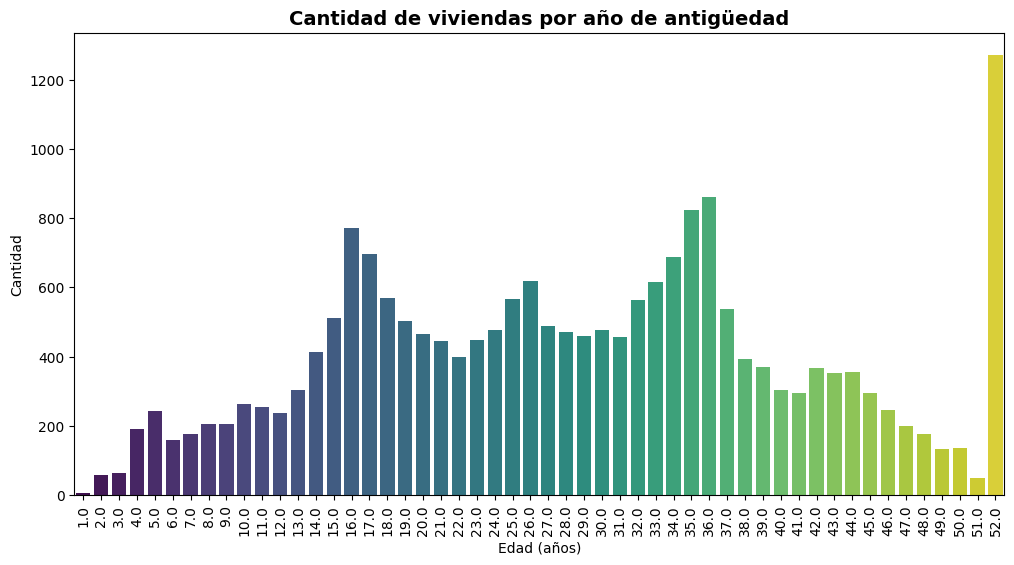

In [ ]:
# Graficar la Cantidad de viviendas por año de antigüedad
plt.figure(figsize=(12,6))
sns.countplot(x='HouseAge', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Cantidad de viviendas por año de antigüedad', fontsize=14, fontweight='bold')
plt.xlabel('Edad (años)')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
# Outliers en la variable HouseAge
Q1 = df['HouseAge'].quantile(0.25)
Q3 = df['HouseAge'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar valores atípicos
outliers = df[(df['HouseAge'] < lower_bound) | (df['HouseAge'] > upper_bound)]

print(f"Número de outliers: {outliers.shape[0]}")
print(outliers['HouseAge'].value_counts().sort_index())

Número de outliers: 0
Series([], Name: count, dtype: int64)


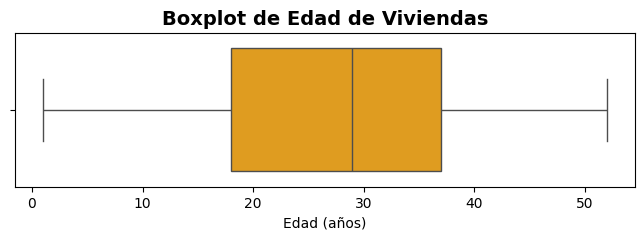

In [ ]:
# Gráfico de caja para analizar la variable más en profundidad
plt.figure(figsize=(8,2))
sns.boxplot(x=df['HouseAge'], color='orange')
plt.title('Boxplot de Edad de Viviendas', fontsize=14, fontweight='bold')
plt.xlabel('Edad (años)')
plt.show()

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Matriz de correlación

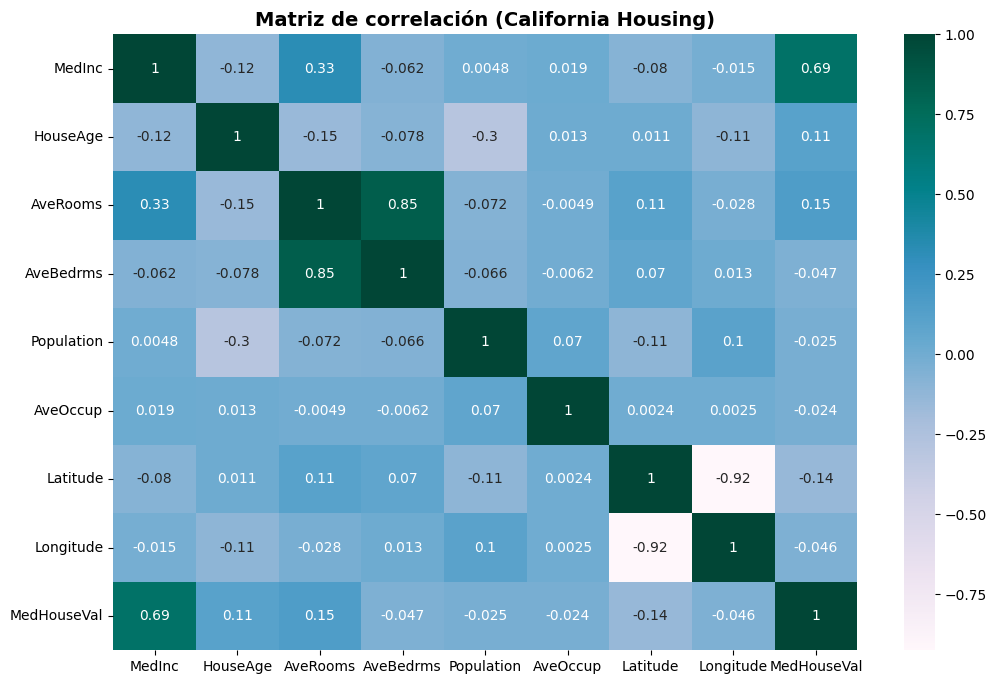

In [ ]:
# Correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='PuBuGn')
plt.title("Matriz de correlación (California Housing)", fontsize=14, fontweight='bold')
plt.show()

## Machine Learning

In [ ]:
# División
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Modelo': name,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by='RMSE')

,Modelo,MSE,RMSE,R²
2,XGBoost,0.222590,0.471794,0.830137
1,Random Forest,0.255368,0.505340,0.805123
0,Linear Regression,0.555892,0.745581,0.575788


### Comprarar los distintos modelos

<ipython-input-61-21d511869cee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Modelo', y='RMSE', palette='PuBuGn')


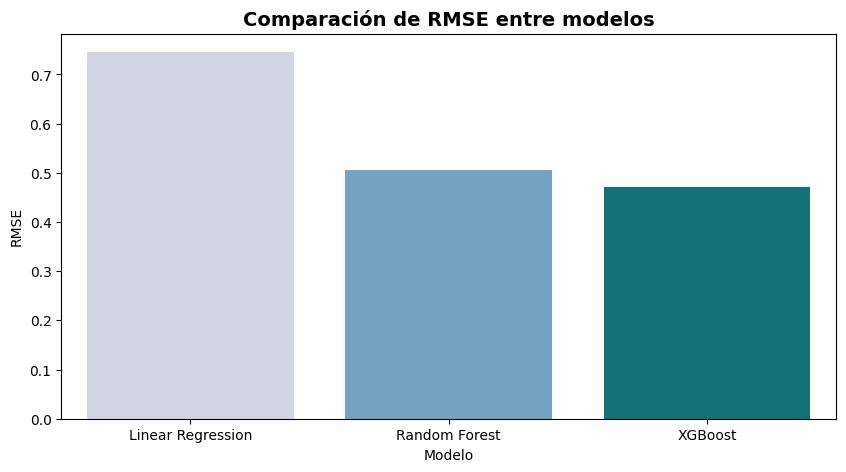

In [ ]:
# Gráfico comparativo
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Modelo', y='RMSE', palette='PuBuGn')
plt.title('Comparación de RMSE entre modelos', fontsize=14, fontweight='bold')
plt.ylabel('RMSE')
plt.xlabel('Modelo')
plt.show()